In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator

In [9]:
df=pd.read_csv("/kaggle/input/indian-startup-funding/startup_funding.csv")
df

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


# Question 1

Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

In [19]:
df.columns=['Sr_No', 'Date_dd/mm/yyyy', 'Startup_Name', 'Industry_Vertical',
       'SubVertical', 'City_Location', 'Investors_Name', 'InvestmentnType',
       'Amount_in_USD', 'Remarks']
df.columns

Index(['Sr_No', 'Date_dd/mm/yyyy', 'Startup_Name', 'Industry_Vertical',
       'SubVertical', 'City_Location', 'Investors_Name', 'InvestmentnType',
       'Amount_in_USD', 'Remarks'],
      dtype='object')

In [20]:
test1 = df.copy()

In [22]:
#filtering na
test1.dropna(inplace = True, subset = ['City_Location'])
test1.reset_index(drop = True, inplace = True)
test1

,Sr_No,Date_dd/mm/yyyy,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investors_Name,InvestmentnType,Amount_in_USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2859,2869,29/04/2015,Tracxn,Startup Analytics platform,NaN,Bangalore,SAIF Partners,Private Equity,"35,00,000",Series A
2860,2870,29/04/2015,Dazo,Mobile Food Ordering app,NaN,Bangalore,"Sumit Jain, Aprameya Radhakrishna, Alok Goel, ...",Seed Funding,NaN,NaN
2861,2871,29/04/2015,Tradelab,Financial Markets Software,NaN,Bangalore,Rainmatter,Seed Funding,"4,00,000",NaN
2862,2872,29/04/2015,PiQube,Hiring Analytics platform,NaN,Chennai,The HR Fund,Seed Funding,"5,00,000",NaN


In [23]:
#function to split indian cities from string
def ind_city(city):
    return city.split('/')[0].strip()

In [25]:
#replacing the wrong written city
test1['City_Location'].replace("bangalore", "Bangalore", inplace = True)
test1['City_Location'].replace("Delhi", "New Delhi", inplace = True)
test1['City_Location'].replace("SFO / Bangalor", "Bangalore", inplace = True)
test1['City_Location'].replace("Seattle / Bangalore", "Bangalore", inplace = True)

In [26]:
#filtering city
test1['City_Location'] = test1['City_Location'].apply(ind_city)

In [28]:
#filtering the cities on the basis of given conditions
test1 = test1[(test1['City_Location'] == "Bangalore") | (test1['City_Location'] == "Mumbai") | (test1['City_Location'] == "Gurgaon") | (test1['City_Location'] == "Noida") | (test1['City_Location'] == "New Delhi")]

In [29]:
#extracting the cities and their counts
temp = test1['City_Location'].value_counts()
city = temp.index
No_Of_Funding = temp.values

In [30]:
#printing the city where most number of funding is Done
print("City where most number of funding is done among Bangalore, Mumbai and NCR is '",city[0],"'.")

City where most number of funding is done among Bangalore, Mumbai and NCR is ' Bangalore '.


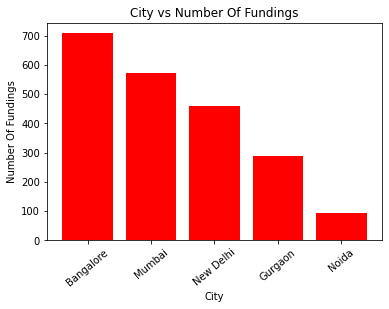

,Name Of City,Number Of Fundings
0,Bangalore,708
1,Mumbai,572
2,New Delhi,459
3,Gurgaon,288
4,Noida,93


In [31]:
#bar Graph
plt.bar(city, No_Of_Funding, color = ['Red'], width = 0.8)
plt.xlabel("City")
plt.xticks(rotation = 40)
plt.ylabel("Number Of Fundings")
plt.title("City vs Number Of Fundings")
plt.show()
li = list(zip(city, No_Of_Funding))

#build pandas dataframe for the city and corresponding investments
freq = pd.DataFrame(li, columns = ["Name Of City", "Number Of Fundings"])
freq

# Question 2

Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [33]:
test2 = df.copy()

In [35]:
test2.columns=['Sr_No', 'Date_dd/mm/yyyy', 'StartupName', 'IndustryVertical',
       'SubVertical', 'CityLocation', 'InvestorsName', 'InvestmentType',
       'Amount_in_USD', 'Remarks']
test2.columns

Index(['Sr_No', 'Date_dd/mm/yyyy', 'StartupName', 'IndustryVertical',
       'SubVertical', 'CityLocation', 'InvestorsName', 'InvestmentType',
       'Amount_in_USD', 'Remarks'],
      dtype='object')

In [36]:
#correcting the spelling in investors name ignoring undisclosed investors
test2['InvestorsName'].replace("Undisclosed investors", "Undisclosed Investors", inplace = True)
test2['InvestorsName'].replace("Undisclosed Investors","",inplace = True)

In [38]:
#filter na
test2.dropna(inplace = True, subset=['InvestorsName'])
test2.reset_index(drop = True, inplace = True)

In [39]:
#function to fill dictionary on the basis of investors name
def build_dict(array):
    d = {}
    #d holds investors name as key and the number of investments as value
    for i in array:
        if ',' not in i and i != "":
            d[i] = d.get(i, 0) + 1
        else:
            #splitting the Investors name list
            string = i.strip().split(',')
            for j in string:
                if j != "":
                    d[j.strip()] = d.get(j.strip(), 0) + 1
                
    return d

In [40]:
dictionary = build_dict(test2['InvestorsName'])

#build pandas dataframe of investors name and its number of investments
invest = pd.DataFrame(list(dictionary.values()), list(dictionary.keys()))

In [41]:
#sort the values in descending order 
invest = invest.sort_values(by = [0], ascending = False)

In [42]:
x = []
y = []

#we have to just find top 5 investors who invest maximum number of times
for i in range(5):
    x.append(invest.index[i])
    y.append(invest.values[i])

In [43]:
#printing the top investors
print("List Of Top 5 Investors who Invested most number of times :")
i = 0
for ele in x:
    print(i+1,end = "")
    print(".", end = " ")
    print(ele)
    i += 1


List Of Top 5 Investors who Invested most number of times :
1. Sequoia Capital
2. Accel Partners
3. Kalaari Capital
4. Blume Ventures
5. SAIF Partners


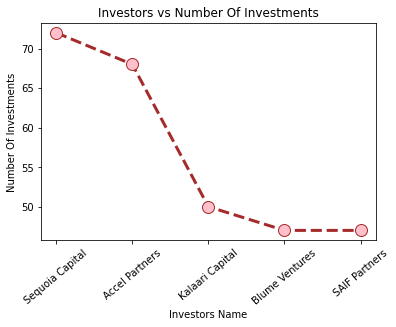

,Name Of Investors,Total Number Of Investments
0,Sequoia Capital,[72]
1,Accel Partners,[68]
2,Kalaari Capital,[50]
3,Blume Ventures,[47]
4,SAIF Partners,[47]


In [44]:
#plot the plot line
plt.plot(x, y, color='brown', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='pink', markersize=12)
plt.xlabel("Investors Name")
plt.xticks(rotation=40)
plt.ylabel("Number Of Investments")
plt.title("Investors vs Number Of Investments")
plt.show()


#pandas frame for Investors name and corresponding Number of Investments made by them
li = list(zip(x,y))
investor_data = pd.DataFrame(li, columns = ["Name Of Investors", "Total Number Of Investments"])
investor_data